# Energy prediction - Python solution, simplified, modularized, fully reproducible

The aim of this notebook is to gather and present the simplified and extended analysis. The code is based on Python translation, but here we provide a simplified version with modularized code and extended options for the sake of analysis.

All of the external functions used in the analysis are available in catalogue `src`. We name the files them according to defined parts of the analysis. Thanks to having them in separate files written in functions form, we can use the code easily in further/other analyses. 

Below find description of the scripts in `src` catalogue.

`rr_I_load_packages.ipynb` - in this jupyter notebook we load all needed packages (in one place to provide clarity and simplicity to the result jupyter notebook.

`rr_III_prepare_data.ipynb` - this jupyter notebook corresponds to the feature engineering part and also it reads and prepares data for the sake of further analyses. 

`rr_IV_select_features.ipynb` - this jupyter notebook refers to feature selection process. We provide a function to decide for features to be applied in final models using our VIF method (one can also skip it / use other feature selection algorithms as forward selection/backward selection or other defined by the user. The VIF selection mechanism is automated and gives as an output the list of final features to be used in the models

`rr_V_prepare_evaluate_model.ipynb` - in this jupyter notebook we provide functions to prepare the data for modelling and build and evaluate a chosen model.

----

#### IMPORTANT! As in the case of the file `Energy_prediction_reproduced_in_Python.ipynb` - before libraries import we set appropriate seeds in order to provide full reproducibility (including CNN calculations).

We follow the instructions outlined here: https://keras.io/getting_started/faq/ (section `How can I obtain reproducible results using Keras during development?`) and here: https://machinelearningmastery.com/reproducible-results-neural-networks-keras/ (section `Seed Random Numbers with the TensorFlow Backend`).

In [107]:
from numpy.random import seed
from tensorflow.random import set_seed
import random as python_random

seed(123)
python_random.seed(123)
set_seed(123)

## 1. Import libraries used in the analysis

We do it by running extrernal jupyter notebook - `rr_I_load_packages.ipynb` - the libraries are listed there and could be freely modified in a separate file

In [108]:
%run src/rr_I_load_packages.ipynb

At this point we also run the rest of the additional jupyter notebooks with defined external functions, that we are going to use in the analysis:

In [109]:
%run src/rr_III_prepare_data.ipynb

In [110]:
%run src/rr_IV_select_features.ipynb

In [111]:
%run src/rr_V_prepare_evaluate_model.ipynb

Define target as a variable - we do it here, once, and it is fixed through whole analysis! :)

In [112]:
#fix the target variable to avoid any mistakes
target_ = 'Appliances'

In [113]:
# load data - using external function
data = read_data()

In [114]:
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


## 2. Exploratory Data Analysis

The EDA is prepared manually, as it consists of a few simple functions. Let's recreate it as in original file.

Check for any missing data

In [115]:
data.isnull().values.sum()

0

No missing values

Prepare summary of numerical features

In [116]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


Check types of columns present in the dataset

In [117]:
data.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

## 3. Feature Engineering

Let's get all features created in the feature engineering part by executing a defined function. We consider all sensible variables (exclude second or year as they have zero variance), we exclude the random variables and add the weekday and time of the day as a numeric to be included in the models.

In [118]:
data_rdy = prepare_data(data)

In [119]:
data_rdy

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,month,day,hour,minute,day_of_week,time_of_day
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,1,11,17,0,0,2
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,1,11,17,10,0,2
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,1,11,17,20,0,2
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,1,11,17,30,0,2
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,1,11,17,40,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,5,27,17,20,4,2
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,5,27,17,30,4,2
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,5,27,17,40,4,2
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,5,27,17,50,4,2


## 4. Feature Selection

As feature selection mechanism, we refer to the mechanism outlined in the original R solution and the translated Python version. We apply the defined external function (based mainly on the function used in the Python translation file, which is based on the StackOverflow answer provided by one of the authors - exact reference available in the function definition). 

Instead of repeating the process manually, we set an appropriate tolerance level (we use the value of 4, as in the 

This is the first step, which indicates that we will obtain results different than in the case of the translation files - we use additional features (we recode the string features into numeric ones) and also the features chosen to be excluded in consecutive steps are different from the ones chosen in the original work. Thus, we would like to clarify - the aim of this notebook is to extend the analysis, which is simplified by using good coding practices and fully reproducible (but is not a reproduced original work).

The function outputs the lists of uncorrelated predictors to be used in the modelling part. We also indicate, that this step could be skipped/substituted for any other feature selection mechanism (forward selection, backwards selection etc.).

In [120]:
predictors_ = feature_selection_vif(data_rdy, target_, 4)

Variable T_out excluded. VIF: 156.133
Variable T9 excluded. VIF: 33.672
Variable T2 excluded. VIF: 29.194
Variable T6 excluded. VIF: 24.725
Variable RH_4 excluded. VIF: 16.3
Variable month excluded. VIF: 14.372
Variable T7 excluded. VIF: 12.539
Variable T1 excluded. VIF: 12.175
Variable RH_3 excluded. VIF: 9.886
Variable RH_7 excluded. VIF: 8.323
Variable T5 excluded. VIF: 7.785
Variable RH_6 excluded. VIF: 7.481
Variable RH_1 excluded. VIF: 6.545
Variable T3 excluded. VIF: 6.251
Variable RH_8 excluded. VIF: 5.369
Variable T4 excluded. VIF: 4.444
Variable RH_2 excluded. VIF: 3.05

 Feature selection done! Finally chosen predictors: 

['lights', 'RH_5', 'T8', 'RH_9', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'day', 'hour', 'minute', 'day_of_week', 'time_of_day']


As in the original solution, before modelling we can take a look at the correlogram for chosen predictors

In [121]:
data_rdy[predictors_].corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,lights,RH_5,T8,RH_9,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,day,hour,minute,day_of_week,time_of_day
lights,1.00,0.14,-0.07,-0.01,-0.01,0.07,0.06,0.02,-0.04,-0.04,0.26,-0.00,-0.10,0.01
RH_5,0.14,1.00,-0.09,0.27,-0.12,0.19,0.08,-0.01,0.08,-0.04,0.10,-0.00,0.01,0.04
T8,-0.07,-0.09,1.00,-0.16,-0.16,-0.30,-0.22,-0.06,0.39,-0.11,0.11,0.00,0.02,0.16
RH_9,-0.01,0.27,-0.16,1.00,-0.18,0.36,0.24,0.01,0.54,-0.06,-0.27,0.00,0.01,-0.13
Press_mm_hg,-0.01,-0.12,-0.16,-0.18,1.00,-0.09,-0.24,0.04,-0.24,0.18,-0.01,0.00,-0.02,-0.01
RH_out,0.07,0.19,-0.30,0.36,-0.09,1.00,-0.18,0.08,0.04,0.07,-0.35,-0.00,0.01,-0.20
Windspeed,0.06,0.08,-0.22,0.24,-0.24,-0.18,1.00,-0.01,0.13,0.03,0.10,-0.00,0.02,0.03
Visibility,0.02,-0.01,-0.06,0.01,0.04,0.08,-0.01,1.00,-0.04,0.01,-0.02,-0.00,-0.04,-0.01
Tdewpoint,-0.04,0.08,0.39,0.54,-0.24,0.04,0.13,-0.04,1.00,-0.06,0.02,-0.00,0.04,-0.01
day,-0.04,-0.04,-0.11,-0.06,0.18,0.07,0.03,0.01,-0.06,1.00,-0.00,-0.00,0.05,-0.00


## 5. Modelling

First, we prepare the data for modelling. The function used below divides the data with chosen predictors into train and test data (by default, in ratio 70/30 - we use the same approach as in CNN case in the original work - 70% of first observations are assigned to the train dataset, while the rest to the test dataset. Then the function divides the train/test data into X/y train/test. After that, the function does scaling of the features - by default we use the standard scaler as in the original work (could be changed to e.g. MinMaxScaler). Finally, it returns X/y train/test data which is ready for modelling.

We prepare this data once, and then we can calculate multiple models (this way we avoid the troubles present in the original work).

In [122]:
#both calls return the same results!
X_train, y_train, X_test, y_test =  prepare_data_for_modelling(data_rdy, target_, predictors_)
X_train, y_train, X_test, y_test =  prepare_data_for_modelling(data_rdy, target_, predictors_, train_ratio=0.7, scaler=StandardScaler())

We are ready to prepare the models!

### 5.1. XGBoost

First, we prepare XGBoost Model. We do so using another external function. By default, the function assumes the XGBoost with hyperparameters defined as in the original work (excluding early stopping - we exclude it in order to make the function more universal). We can also use the function to build models using different algorithms - we will see that later. The extenal function, after creating the model, shows the evaluation metric values for train and test data. By default, it is set to mean absolute percentage error (mape) - it could be also easily changed. For now, let's prepare the XGBoost model!

In [123]:
# minimum function call - all other arguments by default set to reflect the original XGBoost model
create_model_evaluate(X_train, y_train, X_test, y_test)

Model evaluation: 
 Result for train data: 0.05. 
 Result for test data: 0.568.


In [124]:
# call function with defining all arguments for the function -> we obtain the same results
eval_metric_ = mean_absolute_percentage_error
model_ = XGBRegressor
model_params_ = {'objective' : "reg:squarederror",
                         'reg_lambda' : 0.8,
                         'alpha' :0.9,
                         'n_estimators' : 100,
                         'colsample_bytree' : 0.6,
                         'gamma':0.85 , 
                         'eta' : 0.036,
                         'max_depth' : 25, 
                         'min_child_weight' : 1, 
                         'subsample':0.8, 
                         'num_parallel_tree' : 4, 
                         #'early_stopping_rounds' : 50,
                         'random_state' : 123}


create_model_evaluate(X_train, y_train, X_test, y_test, eval_metric_, model_, model_params_)

Model evaluation: 
 Result for train data: 0.05. 
 Result for test data: 0.568.


### 5.2. Convolutional Neural Network

As the structure of the neural nets are different than the standard supervised learning algorithms, we recreate this part manually. Thanks to earlier data preparation, it is very easy - the data is ready, we only need to specify the NN architecture and we can train our CNN. :)

In [125]:
# build cnn model
cnn_model = keras.Sequential()

# we add hidden layers 
cnn_model.add(Dense(16, activation='relu', input_shape = X_train.shape[1:], kernel_regularizer = regularizers.L2(0.01)))
cnn_model.add(Dense(4, activation='relu', kernel_regularizer = regularizers.L2(0.01)))
cnn_model.add(Dense(2, activation='relu', kernel_regularizer = regularizers.L2(0.01)))
cnn_model.add(Dense(1, activation='relu', kernel_regularizer = regularizers.L2(0.01)))

# Compile the model with MAPE as a metric
cnn_model.compile(loss = "mean_squared_error", optimizer = "adam", 
                  metrics = ["mean_absolute_percentage_error"])

In [126]:
# Fit the model and show the training process
history = cnn_model.fit(X_train, y_train, epochs = 100, batch_size = 32, 
                         validation_data = (X_test, y_test))

Epoch 1/100
432/432 [==============================] - 3s 3ms/step - loss: 19273.3535 - mean_absolute_percentage_error: 84.2536 - val_loss: 10122.0566 - val_mean_absolute_percentage_error: 37.2237
Epoch 2/100
432/432 [==============================] - 1s 2ms/step - loss: 10953.7510 - mean_absolute_percentage_error: 62.1631 - val_loss: 8291.4688 - val_mean_absolute_percentage_error: 53.0218
Epoch 3/100
432/432 [==============================] - 1s 2ms/step - loss: 10458.0596 - mean_absolute_percentage_error: 68.3180 - val_loss: 8300.8135 - val_mean_absolute_percentage_error: 56.0242
Epoch 4/100
432/432 [==============================] - 1s 3ms/step - loss: 10295.4639 - mean_absolute_percentage_error: 68.2188 - val_loss: 8238.9932 - val_mean_absolute_percentage_error: 56.0331
Epoch 5/100
432/432 [==============================] - 1s 2ms/step - loss: 10171.4805 - mean_absolute_percentage_error: 68.0801 - val_loss: 8199.4639 - val_mean_absolute_percentage_error: 57.1365
Epoch 6/100
432/432

In [127]:
# train loss and MAPE
cnn_model.evaluate(X_train, y_train)

# test loss and MAPE
cnn_model.evaluate(X_test, y_test)


186/186 [==============================] - 0s 1ms/step - loss: 9866.1553 - mean_absolute_percentage_error: 70.5729


[9866.1552734375, 70.57292938232422]

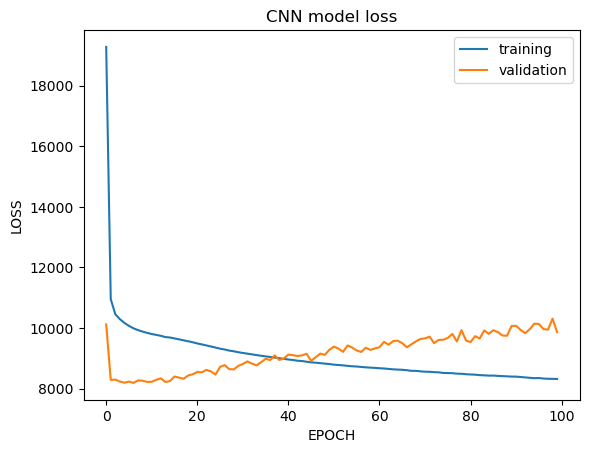

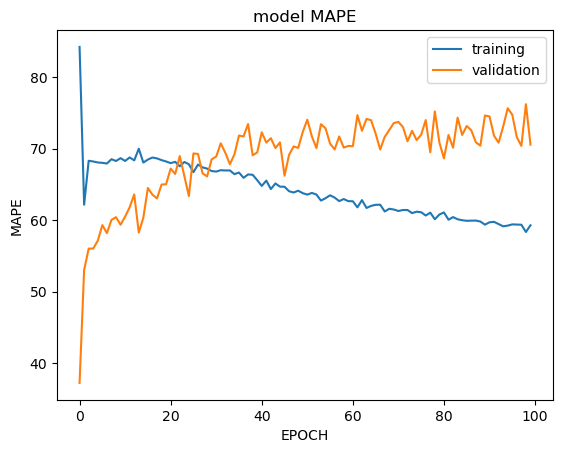

In [128]:
# summarize learning history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN model loss')
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.legend(['training', 'validation'])
plt.show()

# summarize learning history for MAPE
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('model MAPE')
plt.ylabel('MAPE')
plt.xlabel('EPOCH')
plt.legend(['training', 'validation'])
plt.show()

Thanks to universal data preparation and modularized code, we can now obtain results, where we can compare different algorightms' results. We use the same approach to dividing the dataset into train/test sets, we use the same predictors and have the target variable fixed from the beginning of the analysis. The results presented here are fully reproducible, yet they are not a reproduced version of the original analysis. Let's prepare other models using our defined functions! :)

## BONUS - ADDITIONAL ANALYSIS USING PREPARED FUNCTION

In this section we prepare alternative analysis using our defined functions. Firstly, let's prepare the data in other way than in the original work.

In [129]:
# fix the target
target_ = 'Appliances'

In [130]:
# load data - using external function
data = read_data()

In [131]:
# prepare the data - remove nonimportant variables, do feature engineering
data_rdy = prepare_data(data)

In [132]:
# select features - less conservative approach here - we set the VIF tolerance to 15
predictors_ = feature_selection_vif(data_rdy, target_, 15)

Variable T_out excluded. VIF: 156.133
Variable T9 excluded. VIF: 33.672
Variable T2 excluded. VIF: 29.194
Variable T6 excluded. VIF: 24.725
Variable RH_4 excluded. VIF: 16.3
Variable month excluded. VIF: 14.372

 Feature selection done! Finally chosen predictors: 

['lights', 'T1', 'RH_1', 'RH_2', 'T3', 'RH_3', 'T4', 'T5', 'RH_5', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_9', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'day', 'hour', 'minute', 'day_of_week', 'time_of_day']


In [133]:
# prepare data for the modelling - this time we use train/test split ratio 80/20 + we use the MinMaxScaler to scale the predictors
X_train, y_train, X_test, y_test =  prepare_data_for_modelling(data_rdy, target_, predictors_, train_ratio=0.8, scaler=MinMaxScaler())

The datasets are ready for modelling - let's build different models using our function and evaluate them using various metrics!

In [134]:
# 1 - XGBoost with hyperparameters defined as earlier, MAPE as our evaluation metric
eval_metric_ = mean_absolute_percentage_error
model_ = XGBRegressor
model_params_ = {'objective' : "reg:squarederror",
                         'reg_lambda' : 0.8,
                         'alpha' :0.9,
                         'n_estimators' : 100,
                         'colsample_bytree' : 0.6,
                         'gamma':0.85 , 
                         'eta' : 0.036,
                         'max_depth' : 25, 
                         'min_child_weight' : 1, 
                         'subsample':0.8, 
                         'num_parallel_tree' : 4, 
                         #'early_stopping_rounds' : 50,
                         'random_state' : 123}


create_model_evaluate(X_train, y_train, X_test, y_test, eval_metric_, model_, model_params_)

Model evaluation: 
 Result for train data: 0.047. 
 Result for test data: 0.857.


In [135]:
# 2 - XGBoost with a different set of hyperparameters, mean absolute error as an evaluation metric
eval_metric_ = mean_absolute_error
model_ = XGBRegressor
model_params_ = {'objective' : "reg:squarederror",
                         'reg_lambda' : 0.3,
                         'alpha' :0.3,
                         'n_estimators' : 300,
                         'colsample_bytree' : 0.9,
                         'gamma':0.1 , 
                         'eta' : 0.01,
                         'max_depth' : 3, 
                         'min_child_weight' : 1, 
                         'subsample':0.8, 
                         'random_state' : 123}

create_model_evaluate(X_train, y_train, X_test, y_test, eval_metric_, model_, model_params_)

Model evaluation: 
 Result for train data: 46.971. 
 Result for test data: 58.805.


In [136]:
# 3 - Random Forest model, explained_variance_score (R^2) as an evaluation metric 
eval_metric_ = explained_variance_score
model_ = RandomForestRegressor
model_params_ = {'criterion' : "absolute_error",
                 'n_estimators' : 50,
                 'max_depth' : 3,
                 'max_features' : 4,
                 'random_state' : 123}

create_model_evaluate(X_train, y_train, X_test, y_test, eval_metric_, model_, model_params_)

Model evaluation: 
 Result for train data: 0.077. 
 Result for test data: 0.049.


In [137]:
# 4 - Linear regression - median_absolute_error as an evaluation metric
eval_metric_ = mean_absolute_error
model_ = LinearRegression
model_params_ = {}

create_model_evaluate(X_train, y_train, X_test, y_test, eval_metric_, model_, model_params_)

Model evaluation: 
 Result for train data: 55.04. 
 Result for test data: 66.009.


In [138]:
# 5 - Light GBM - mean_squared_error as an evaluation metric
eval_metric_ = mean_squared_error
model_ = LGBMRegressor
model_params_ = {'objective' : "regression",
                 'num_iterations' : 400,
                 'learning_rate' : 0.01,
                 'max_depth' : 5, 
                 'subsample':0.8,
                 'random_state' : 123}

create_model_evaluate(X_train, y_train, X_test, y_test, eval_metric_, model_, model_params_)

C:\Users\kamil\anaconda3\envs\env_rr\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Model evaluation: 
 Result for train data: 6581.305. 
 Result for test data: 9434.54.


As we can see, there are plenty options to be used. As the final part of the analysis, let's prepare and compare the results for four different models. As an evaluation metric we will use MAPE.

In [139]:
eval_metric_ = mean_absolute_percentage_error

In [140]:
# LINEAR REGRESSION
model_ = LinearRegression
model_params_ = {}

print('LINEAR REGRESSION RESULTS:')
create_model_evaluate(X_train, y_train, X_test, y_test, eval_metric_, model_, model_params_)

LINEAR REGRESSION RESULTS:
Model evaluation: 
 Result for train data: 0.652. 
 Result for test data: 0.829.


In [141]:
# RANDOM FOREST
model_ = RandomForestRegressor
model_params_ = {'criterion' : "absolute_error",
                 'n_estimators' : 50,
                 'max_depth' : 3,
                 'max_features' : 4,
                 'random_state' : 123}

print('RANDOM FOREST RESULTS:')
create_model_evaluate(X_train, y_train, X_test, y_test, eval_metric_, model_, model_params_)

RANDOM FOREST RESULTS:
Model evaluation: 
 Result for train data: 0.358. 
 Result for test data: 0.293.


In [142]:
# XGBOOST
model_ = XGBRegressor
model_params_ = {'objective' : "reg:squarederror",
                         'reg_lambda' : 0.3,
                         'alpha' :0.3,
                         'n_estimators' : 300,
                         'colsample_bytree' : 0.9,
                         'gamma':0.1 , 
                         'eta' : 0.01,
                         'max_depth' : 3, 
                         'min_child_weight' : 1, 
                         'subsample':0.8, 
                         'random_state' : 123}

print('XGBOOST RESULTS:')
create_model_evaluate(X_train, y_train, X_test, y_test, eval_metric_, model_, model_params_)

XGBOOST RESULTS:
Model evaluation: 
 Result for train data: 0.506. 
 Result for test data: 0.718.


In [143]:
# LIGHT GBM
model_ = LGBMRegressor
model_params_ = {'objective' : "regression",
                 'num_iterations' : 400,
                 'learning_rate' : 0.01,
                 'max_depth' : 5, 
                 'subsample':0.8,
                 'random_state' : 123}

print('LIGHT GBM RESULTS:')
create_model_evaluate(X_train, y_train, X_test, y_test, eval_metric_, model_, model_params_)

LIGHT GBM RESULTS:


C:\Users\kamil\anaconda3\envs\env_rr\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Model evaluation: 
 Result for train data: 0.476. 
 Result for test data: 0.811.


Out of the prepared models, the best (in terms of lowest MAPE on test data) is Random Forest. 

### Summary

In this notebook, we used good practices, in order to make our analysis both simplified and extended. We defined the external functions, which could be used in further analysis (as we presented in the `Bonus` section) or in other analyses of time-series data. We fixed our target variable at the start, and prepared and transformed the dataset once, and in the same way for all considered models. 

As an extension to the original work, we provide a function to select features according to VIF values in an automatic way (the function is based on the function provided as an answer in StackOverflow thread). Moreover, we provide a universal function, which enables us to build a set of various ML models and we can evaluate them using any available metric.

This analysis is fully reproducible, but **it is not a reproduced original solution**. We treat it as a reference: How the original work could be built to provide full reproducibility and to avoid the mistakes in the data and models preparation phases.